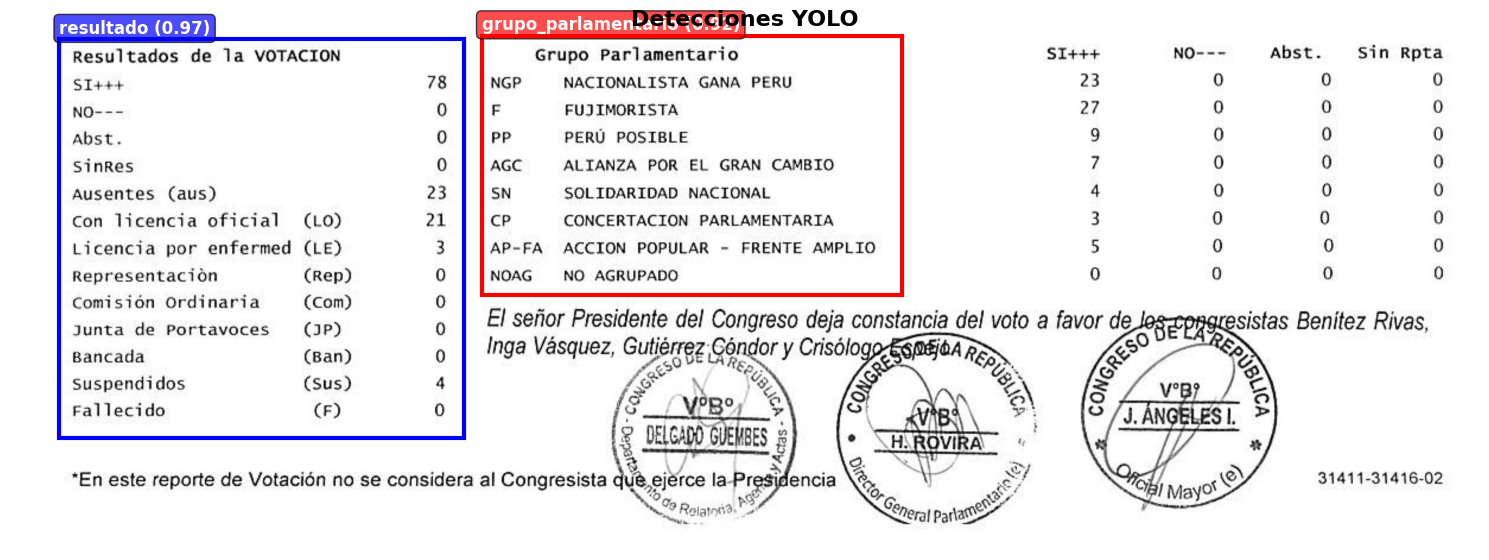


📊 Resumen de detecciones:
Total de regiones detectadas: 2
1. resultado | Confianza: 97.07% | Posición: (82, 9) → (765, 681)
2. grupo_parlamentario | Confianza: 92.29% | Posición: (794, 3) → (1503, 440)


In [2]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
from matplotlib.patches import Rectangle

# 🎯 CONFIGURACIÓN
image_path = "/home/nahumfg/GithubProjects/parliament-voting-records/data/procesamiento_todas_votaciones/b_zonas/4ee05f68-886a-547c-8c19-379d6ae64af5_page007_/pie_2.jpg"
model_path = "/home/nahumfg/GithubProjects/parliament-voting-records/validation/yolo_pies/experiments/yolo11n_img320_bs32_fold_3/weights/best.pt"

# 📦 Cargar modelo y imagen
model = YOLO(model_path)
image_bgr = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# 🔍 Detectar regiones
results = model.predict(
    source=image_bgr,
    conf=0.001,        # Mismo que en entrenamiento
    iou=0.7,          # Mismo que en entrenamiento  
    max_det=2,        # Exactamente 3 detecciones
    agnostic_nms=True, # NMS agnóstico entre clases
    verbose=False
)

# 📊 Visualizar resultados
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.imshow(image_rgb)

# Colores para cada clase
colors = ['red', 'blue', 'green', 'yellow', 'purple', 'orange']

for result in results:
    boxes = result.boxes
    labels = result.names
    
    for i, box in enumerate(boxes):
        # Coordenadas
        x_min, y_min, x_max, y_max = map(int, box.xyxy[0])
        width = x_max - x_min
        height = y_max - y_min
        
        # Label y confianza
        cls_id = int(box.cls[0])
        label = labels[cls_id]
        conf = float(box.conf[0])
        
        # Dibujar rectángulo
        color = colors[cls_id % len(colors)]
        rect = Rectangle((x_min, y_min), width, height, 
                         linewidth=3, edgecolor=color, facecolor='none')
        ax.add_patch(rect)
        
        # Añadir texto
        ax.text(x_min, y_min - 10, f'{label} ({conf:.2f})', 
                bbox=dict(boxstyle='round', facecolor=color, alpha=0.7),
                fontsize=12, color='white', weight='bold')

ax.axis('off')
plt.tight_layout()
plt.title('Detecciones YOLO', fontsize=16, weight='bold')
plt.show()

# 📋 Resumen de detecciones
print(f"\n📊 Resumen de detecciones:")
print(f"Total de regiones detectadas: {len(boxes)}")
for i, box in enumerate(boxes, 1):
    cls_id = int(box.cls[0])
    label = labels[cls_id]
    conf = float(box.conf[0])
    x_min, y_min, x_max, y_max = map(int, box.xyxy[0])
    print(f"{i}. {label} | Confianza: {conf:.2%} | Posición: ({x_min}, {y_min}) → ({x_max}, {y_max})")